### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.set_random_seed(42)

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [3]:
tf.__version__

'1.13.1'

'1.6.0'

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [5]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 15s 3us/step


In [6]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [7]:
# one-hot encode the training and testing labels
trainY = tf.keras.utils.to_categorical(trainY, 10)
testY = tf.keras.utils.to_categorical(testY, 10)

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
len(trainY)
trainY.dtype

dtype('float32')

In [10]:
trainY

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
trainX.shape

(60000, 28, 28)

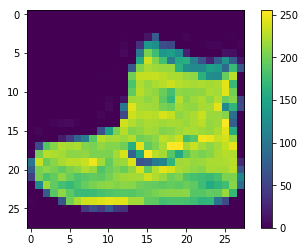

In [16]:
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
trainX = trainX / 255.0

testX = testX / 255.0

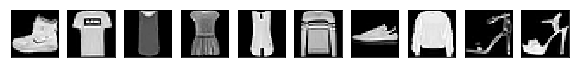

In [21]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(trainX[i], cmap=plt.cm.binary_r)
    #plt.xlabel(class_names[trainY[i]])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [22]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model ((We will learn about optimizers it in the next residency))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Execute the model using model.fit()

In [23]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 1s 19us/sample - loss: 2.4895 - acc: 0.0538 - val_loss: 2.4302 - val_acc: 0.0603
Epoch 2/10
60000/60000 [==============================] - 1s 11us/sample - loss: 2.4265 - acc: 0.0591 - val_loss: 2.3777 - val_acc: 0.0661
Epoch 3/10
60000/60000 [==============================] - 1s 9us/sample - loss: 2.3741 - acc: 0.0659 - val_loss: 2.3327 - val_acc: 0.0762
Epoch 4/10
60000/60000 [==============================] - 1s 9us/sample - loss: 2.3292 - acc: 0.0772 - val_loss: 2.2935 - val_acc: 0.0896
Epoch 5/10
60000/60000 [==============================] - 1s 9us/sample - loss: 2.2901 - acc: 0.0888 - val_loss: 2.2587 - val_acc: 0.1019
Epoch 6/10
60000/60000 [==============================] - 1s 9us/sample - loss: 2.2553 - acc: 0.1027 - val_loss: 2.2274 - val_acc: 0.1142
Epoch 7/10
60000/60000 [==============================] - 1s 9us/sample 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [24]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model ((We will learn about optimizers it in the next residency))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [25]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/sample - loss: 3.1773 - acc: 0.0720 - val_loss: 2.4494 - val_acc: 0.0623
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 2.8452 - acc: 0.0948 - val_loss: 2.3479 - val_acc: 0.0609
Epoch 3/10
60000/60000 [==============================] - 1s 23us/sample - loss: 2.5721 - acc: 0.1241 - val_loss: 2.2657 - val_acc: 0.0711
Epoch 4/10
60000/60000 [==============================] - 1s 23us/sample - loss: 2.3470 - acc: 0.1639 - val_loss: 2.1972 - val_acc: 0.0989
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 2.1606 - acc: 0.2096 - val_loss: 2.1391 - val_acc: 0.1365
Epoch 6/10
60000/60000 [==============================] - 2s 25us/sample - loss: 2.0057 - acc: 0.2603 - val_loss: 2.0889 - val_acc: 0.1792
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 1.8764 - acc: 0.3108 - val_loss: 2.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [26]:
#from keras import optimizers
from tensorflow.keras import optimizers

In [27]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Added Learning Rate as 0.001 in SGD optimizer
sgd = optimizers.SGD(lr=0.001)
#Comile the model ((We will learn about optimizers it in the next residency))
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/sample - loss: 2.8100 - acc: 0.1055 - val_loss: 2.3412 - val_acc: 0.1447
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 2.7854 - acc: 0.1093 - val_loss: 2.3335 - val_acc: 0.1479
Epoch 3/10
60000/60000 [==============================] - 2s 27us/sample - loss: 2.7612 - acc: 0.1132 - val_loss: 2.3258 - val_acc: 0.1499
Epoch 4/10
60000/60000 [==============================] - 2s 28us/sample - loss: 2.7375 - acc: 0.1173 - val_loss: 2.3182 - val_acc: 0.1523
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 2.7141 - acc: 0.1217 - val_loss: 2.3107 - val_acc: 0.1555
Epoch 6/10
60000/60000 [==============================] - 1s 23us/sample - loss: 2.6912 - acc: 0.1262 - val_loss: 2.3032 - val_acc: 0.1571
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 2.6687 - acc: 0.1308 - val_loss: 2.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [29]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
#model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 100, 100, 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Added Learning Rate as 0.001 in SGD optimizer
sgd = optimizers.SGD(lr=0.03)
#Comile the model ((We will learn about optimizers it in the next residency))
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


## Review model

In [30]:
# Evaluate the model on test set
score = model.evaluate(testX, testY, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.0976


### Run the model

In [31]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 19us/sample - loss: 2.3771 - acc: 0.0995 - val_loss: 2.3002 - val_acc: 0.1360
Epoch 2/10
60000/60000 [==============================] - 1s 13us/sample - loss: 2.3015 - acc: 0.1378 - val_loss: 2.2419 - val_acc: 0.1892
Epoch 3/10
60000/60000 [==============================] - 1s 14us/sample - loss: 2.2429 - acc: 0.1898 - val_loss: 2.1936 - val_acc: 0.2281
Epoch 4/10
60000/60000 [==============================] - 1s 15us/sample - loss: 2.1942 - acc: 0.2297 - val_loss: 2.1517 - val_acc: 0.2557
Epoch 5/10
60000/60000 [==============================] - 1s 13us/sample - loss: 2.1519 - acc: 0.2575 - val_loss: 2.1143 - val_acc: 0.2843
Epoch 6/10
60000/60000 [==============================] - 1s 12us/sample - loss: 2.1140 - acc: 0.2817 - val_loss: 2.0798 - val_acc: 0.3054
Epoch 7/10
60000/60000 [==============================] - 1s 12us/sample - loss: 2.0792 - acc: 0.3034 - val_loss: 2.